# EDA of Wine Data

Step 1. Load cleaned data into a data frames for each set of data.

In [1]:
import os
import pandas as pd
import numpy as np

from data_cleaner import DataCleaner

In [2]:
input_folder = "Data"  # Path to the folder containing CSV files
output_file = "cleaned_data.csv"  # Path where cleaned data will be saved

RawWineData = pd.DataFrame()

# Loop through all CSV files in the folder
for filename in os.listdir(input_folder):
    if filename.endswith(".csv"):
        print(f"Processing file: {filename}")
        file_path = os.path.join(input_folder, filename)
        df = pd.read_csv(file_path)

        # Append the cleaned data to the final dataframe
        RawWineData = pd.concat([RawWineData, df])

print(
    f"Data compiling complete. Rows in data: {len(RawWineData)}")

Processing file: BlackTie2309(25degEnvTemp).csv
Processing file: Moscato2309(25degEnvTemp).csv
Processing file: Namaqua2309(25degEnvTemp).csv
Processing file: SilverMyn2309(25degEnvTemp).csv
Processing file: Sophie2309(25degEnvTemp).csv
Processing file: TallHorse2309(25degEnvTemp).csv
Data compiling complete. Rows in data: 3453


In [34]:
# Initialize the DataCleaner with folder path and output file
cleaner = DataCleaner(input_folder, output_file, cleaning_method='z_score')
cleanedData = cleaner.clean_data()  # Call the cleaning function

TypeError: DataCleaner.clean_data() got an unexpected keyword argument 'cleaning_method'

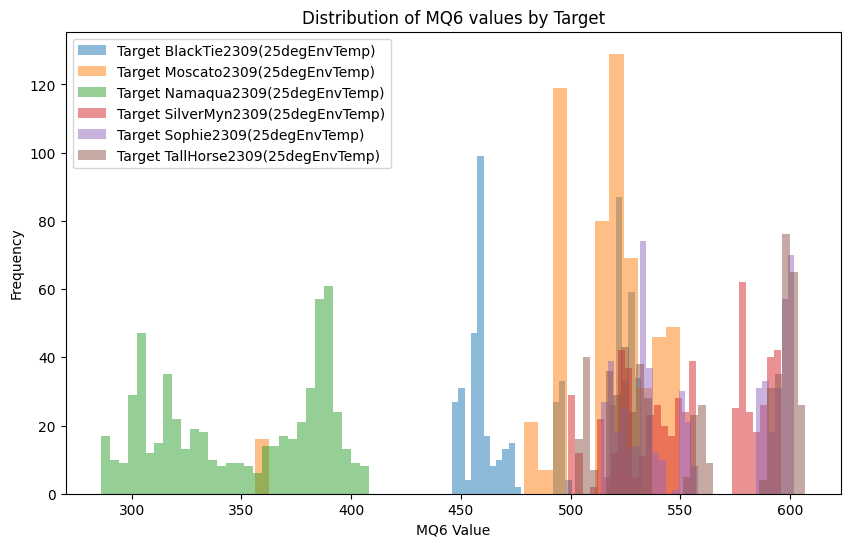

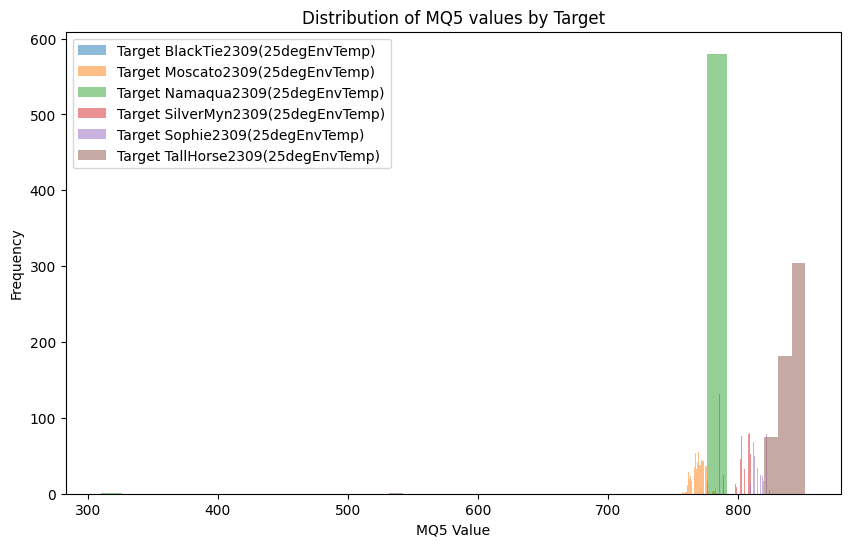

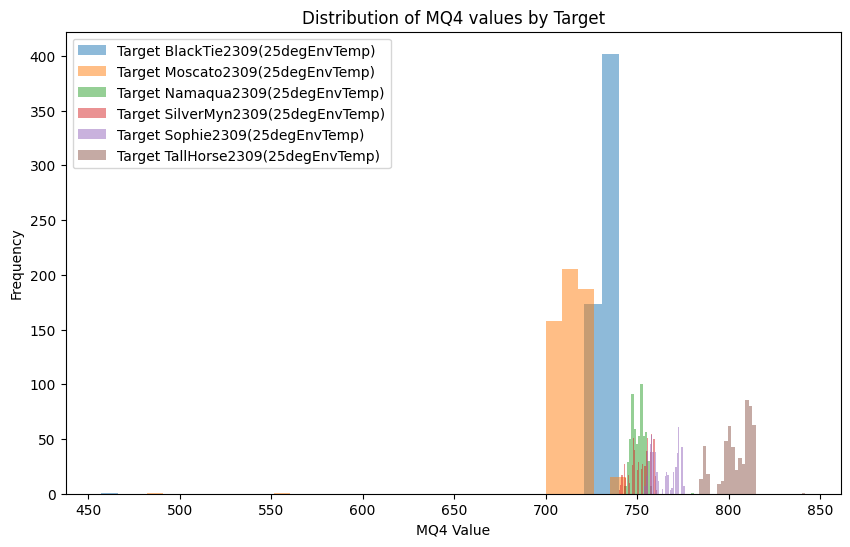

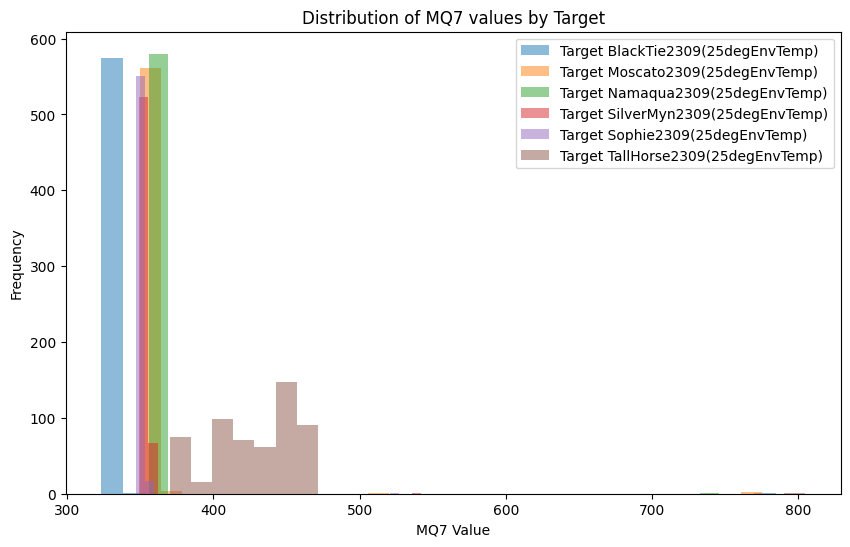

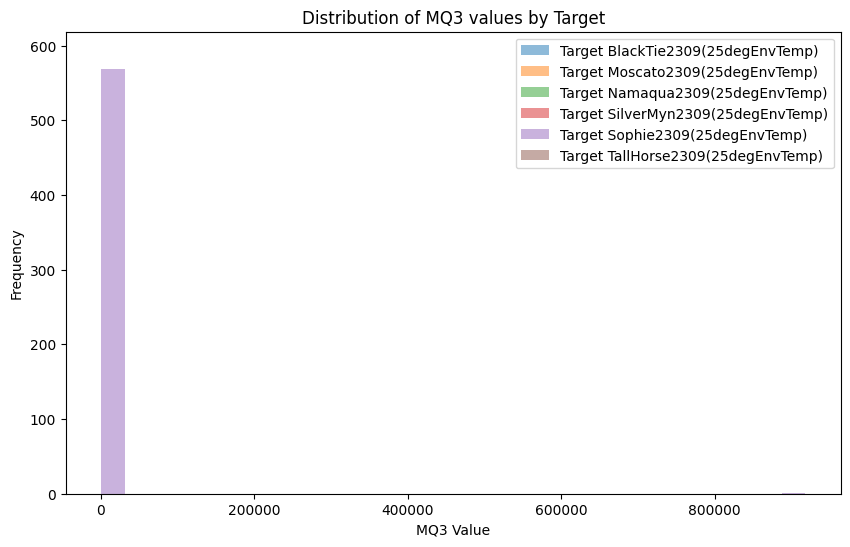

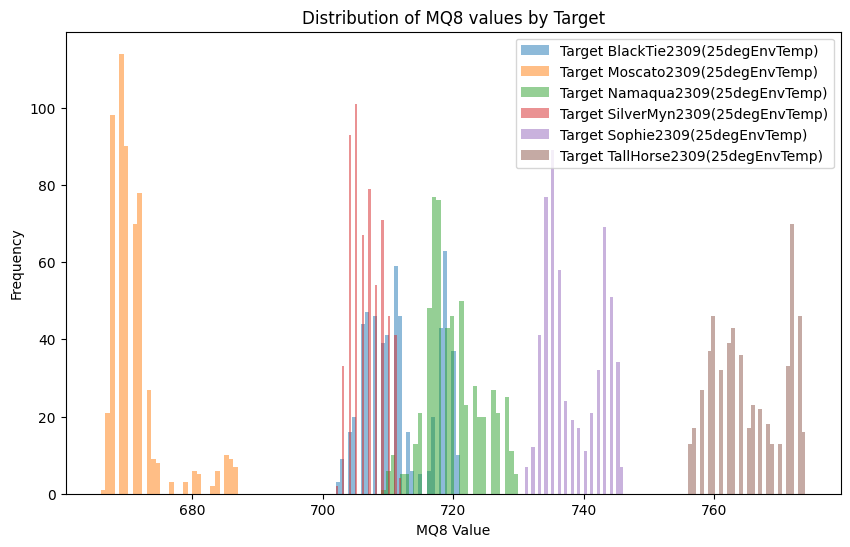

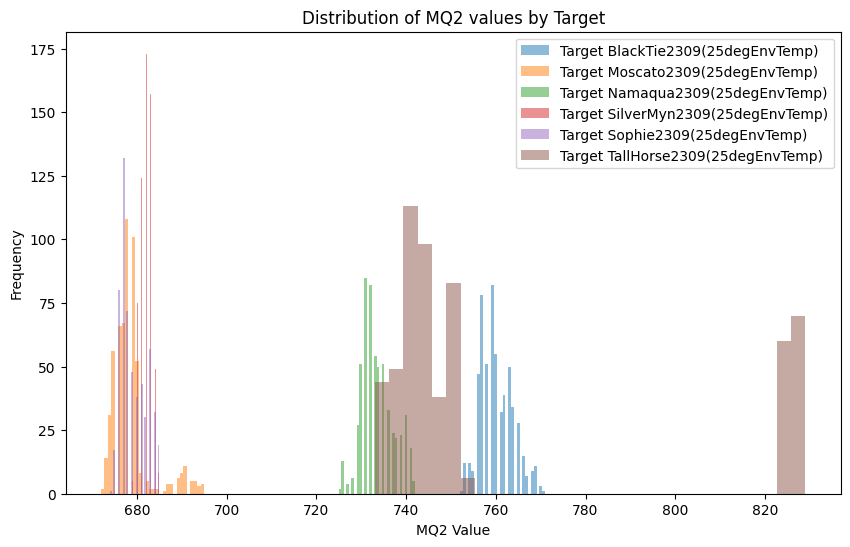

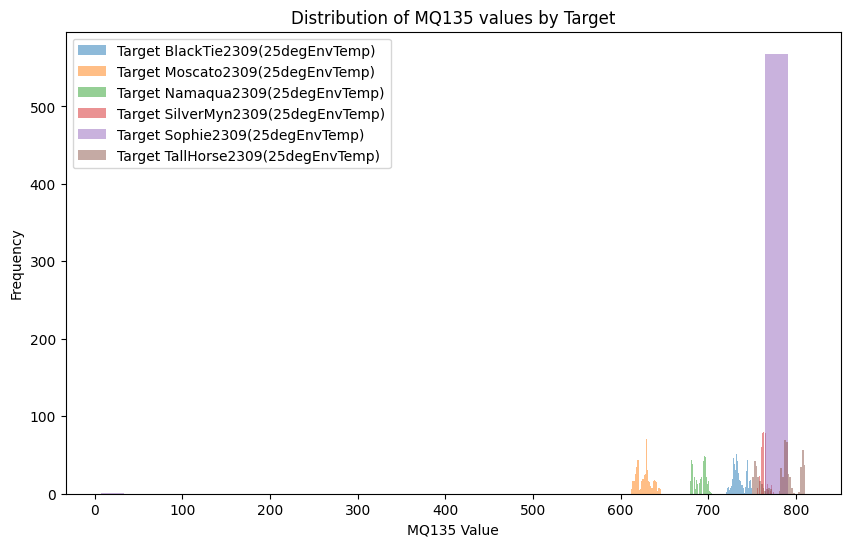

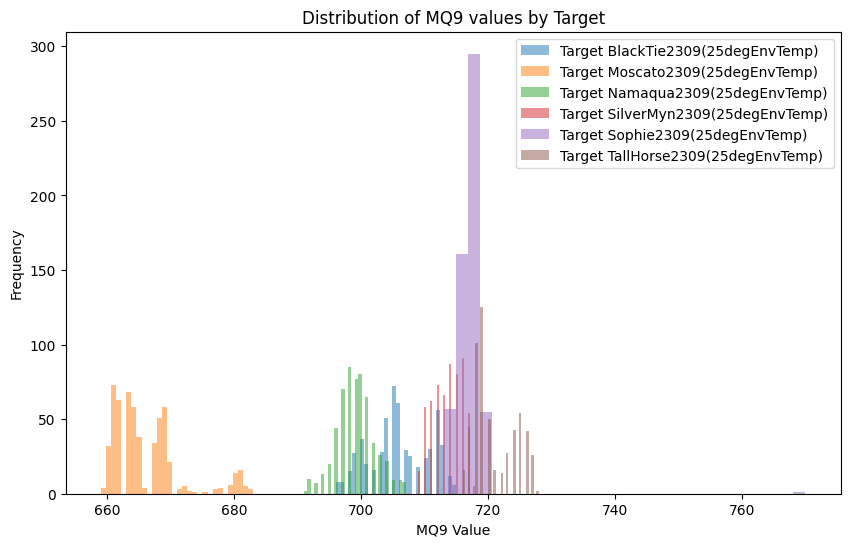

In [4]:
cleaner.plot_histograms(cleanedData)

In [5]:
cleanedData = cleanedData.drop(columns=['yyyy-mm-dd timestamp','BMPTemperature','DHTTemperature','Humidity','Pressure(Pa)']
                          )  # Drop the timestamp column
        # Features excluding 'Target'

C:\Users\jessd\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


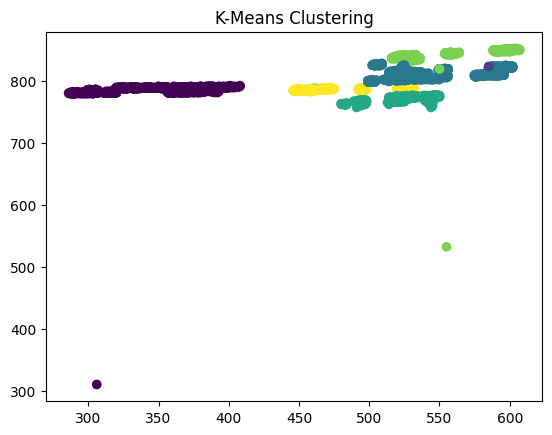

,Cluster,Wine
0,5,BlackTie2309(25degEnvTemp)
1,5,BlackTie2309(25degEnvTemp)
2,5,BlackTie2309(25degEnvTemp)
3,5,BlackTie2309(25degEnvTemp)
4,5,BlackTie2309(25degEnvTemp)


In [26]:
import numpy as np
from clustering import ClusteringTechniques  # Import your class from the file (if saved separately)

# Step 2: Initialize the ClusteringTechniques class with your data
clustering = ClusteringTechniques(cleanedData)

# Assuming you have the DataFrame loaded as `df`
import pandas as pd

# Perform K-Means clustering
kmeans_labels = clustering.kmeans(n_clusters=6)

# Visualize the K-Means clustering result
clustering.visualize(kmeans_labels, "K-Means Clustering")

# Compare clustering results with actual wine types
results = clustering.evaluate_with_target(kmeans_labels)
# print(results)
# results.head()

In [7]:
cleanedData.head()

,MQ6,MQ5,MQ4,MQ7,MQ3,MQ8,MQ2,MQ135,MQ9,Target
0,523,786,734,330,917.0,705,754,727,699,BlackTie2309(25degEnvTemp)
1,523,786,734,329,919.0,708,757,730,701,BlackTie2309(25degEnvTemp)
2,522,787,734,329,920.0,708,757,729,702,BlackTie2309(25degEnvTemp)
3,522,788,733,327,918.0,708,757,729,701,BlackTie2309(25degEnvTemp)
4,520,787,735,330,919.0,708,759,730,703,BlackTie2309(25degEnvTemp)


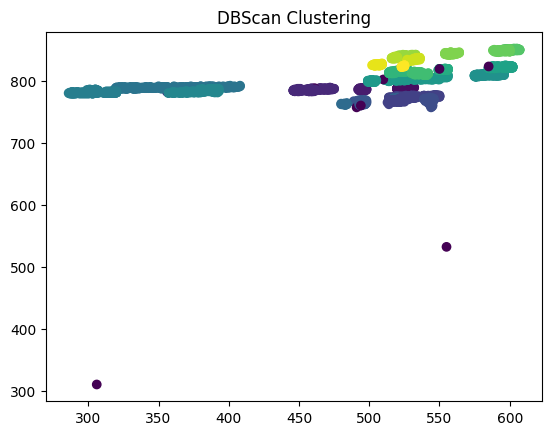

In [33]:
dbscan_labels = clustering.dbscan(eps=10, min_samples=5)

clustering.visualize(dbscan_labels, "DBScan Clustering")
